In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")


%matplotlib inline

In [29]:
df = pd.read_csv('C:\pregenancy_risk_prediction\data.csv',encoding='utf-8',encoding_errors='ignore')

In [30]:
df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [31]:
df.shape

(6103, 11)

In [32]:
df.drop(columns=['Patient ID','Name'],inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6103 non-null   int64  
 1   Body Temperature(F)                6103 non-null   float64
 2   Heart rate(bpm)                    6103 non-null   int64  
 3   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 4   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 5   BMI(kg/m 2)                        6103 non-null   float64
 6   Blood Glucose(HbA1c)               6103 non-null   int64  
 7   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 8   Outcome                            6103 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 429.2+ KB


In [12]:
df.isna().sum()

Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

#### There is no null values

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Patient ID,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6.103000e+03,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,2.003343e+06,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752
std,6.604395e+03,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327
min,1.993365e+06,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,1.994890e+06,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,2.003000e+06,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,2.010128e+06,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,2.013179e+06,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


In [13]:
numerical_col = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_col = [feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print('We have {} numerical features : {}'.format(len(numerical_col), numerical_col))
print('\nWe have {} categorical features : {}'.format(len(categorical_col), categorical_col))

We have 8 numerical features : ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

We have 1 categorical features : ['Outcome']


In [10]:
print(numerical_col)

['Patient ID', 'Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']


In [27]:
numerical_col.remove('Patient ID')

In [8]:
# proportion of count data on categorical columns
for col in categorical_col:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Name
Ratna          0.065542
Manvitha       0.049156
Rama           0.049156
Hema           0.049156
Bhagya         0.049156
                 ...   
Rajathilaka    0.016385
Raadhani       0.016385
Nutan          0.016385
Rihana         0.016385
Likita         0.016385
Name: proportion, Length: 5795, dtype: float64
---------------------------
Outcome
high risk    33.737506
mid risk     33.475340
low risk     32.787154
Name: proportion, dtype: float64
---------------------------


#### Insigts
#### We can remove name and patient id column because it has no importance


### Univariate Analysis

##### Numerical features

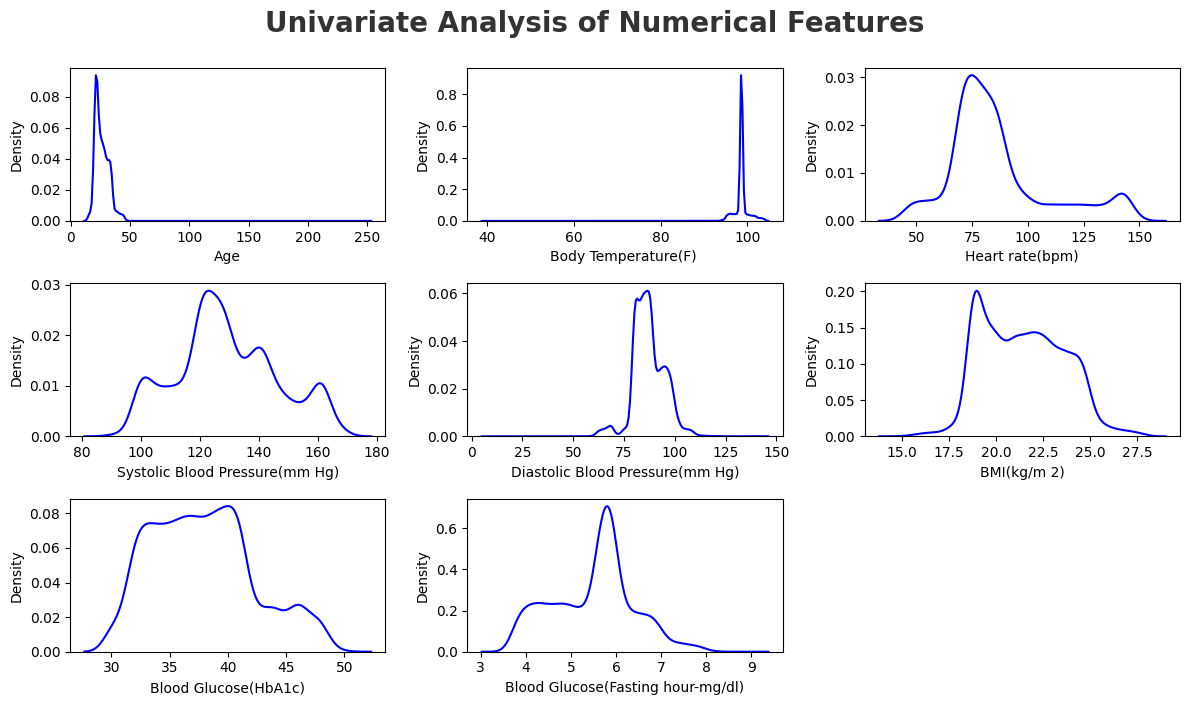

In [13]:
plt.figure(figsize=(12, 7))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_col)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numerical_col[i]], color='blue')
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

##### Insigts
##### Age and Body Temperature column looks more skewed but it may be because of outlies.


In [28]:
categorical_col.remove('Name')

##### Categorical Feature

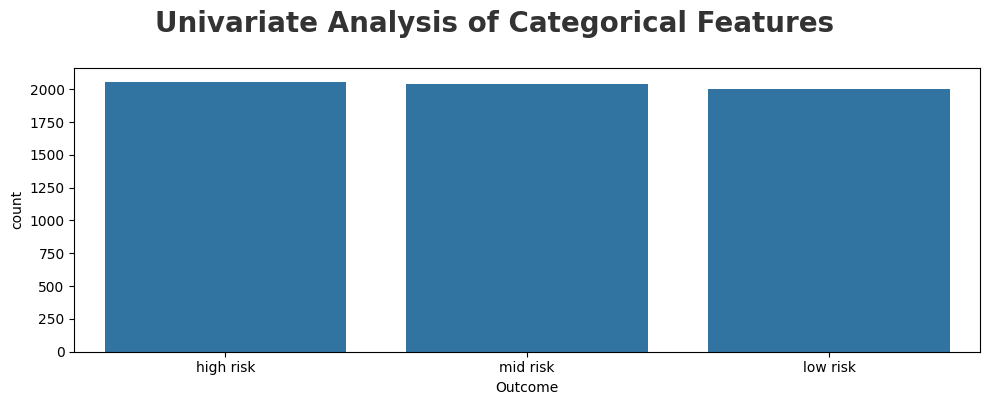

In [15]:
plt.figure(figsize=(10, 4))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df['Outcome'])
plt.xlabel(categorical_col[0])
plt.tight_layout()

#### Dependent features is balanced

In [14]:
discrete_features=[feature for feature in numerical_col if len(df[feature].unique())<=10]

continuous_features=[feature for feature in numerical_col if len(df[feature].unique()) > 10]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 8 continuous_features : ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']


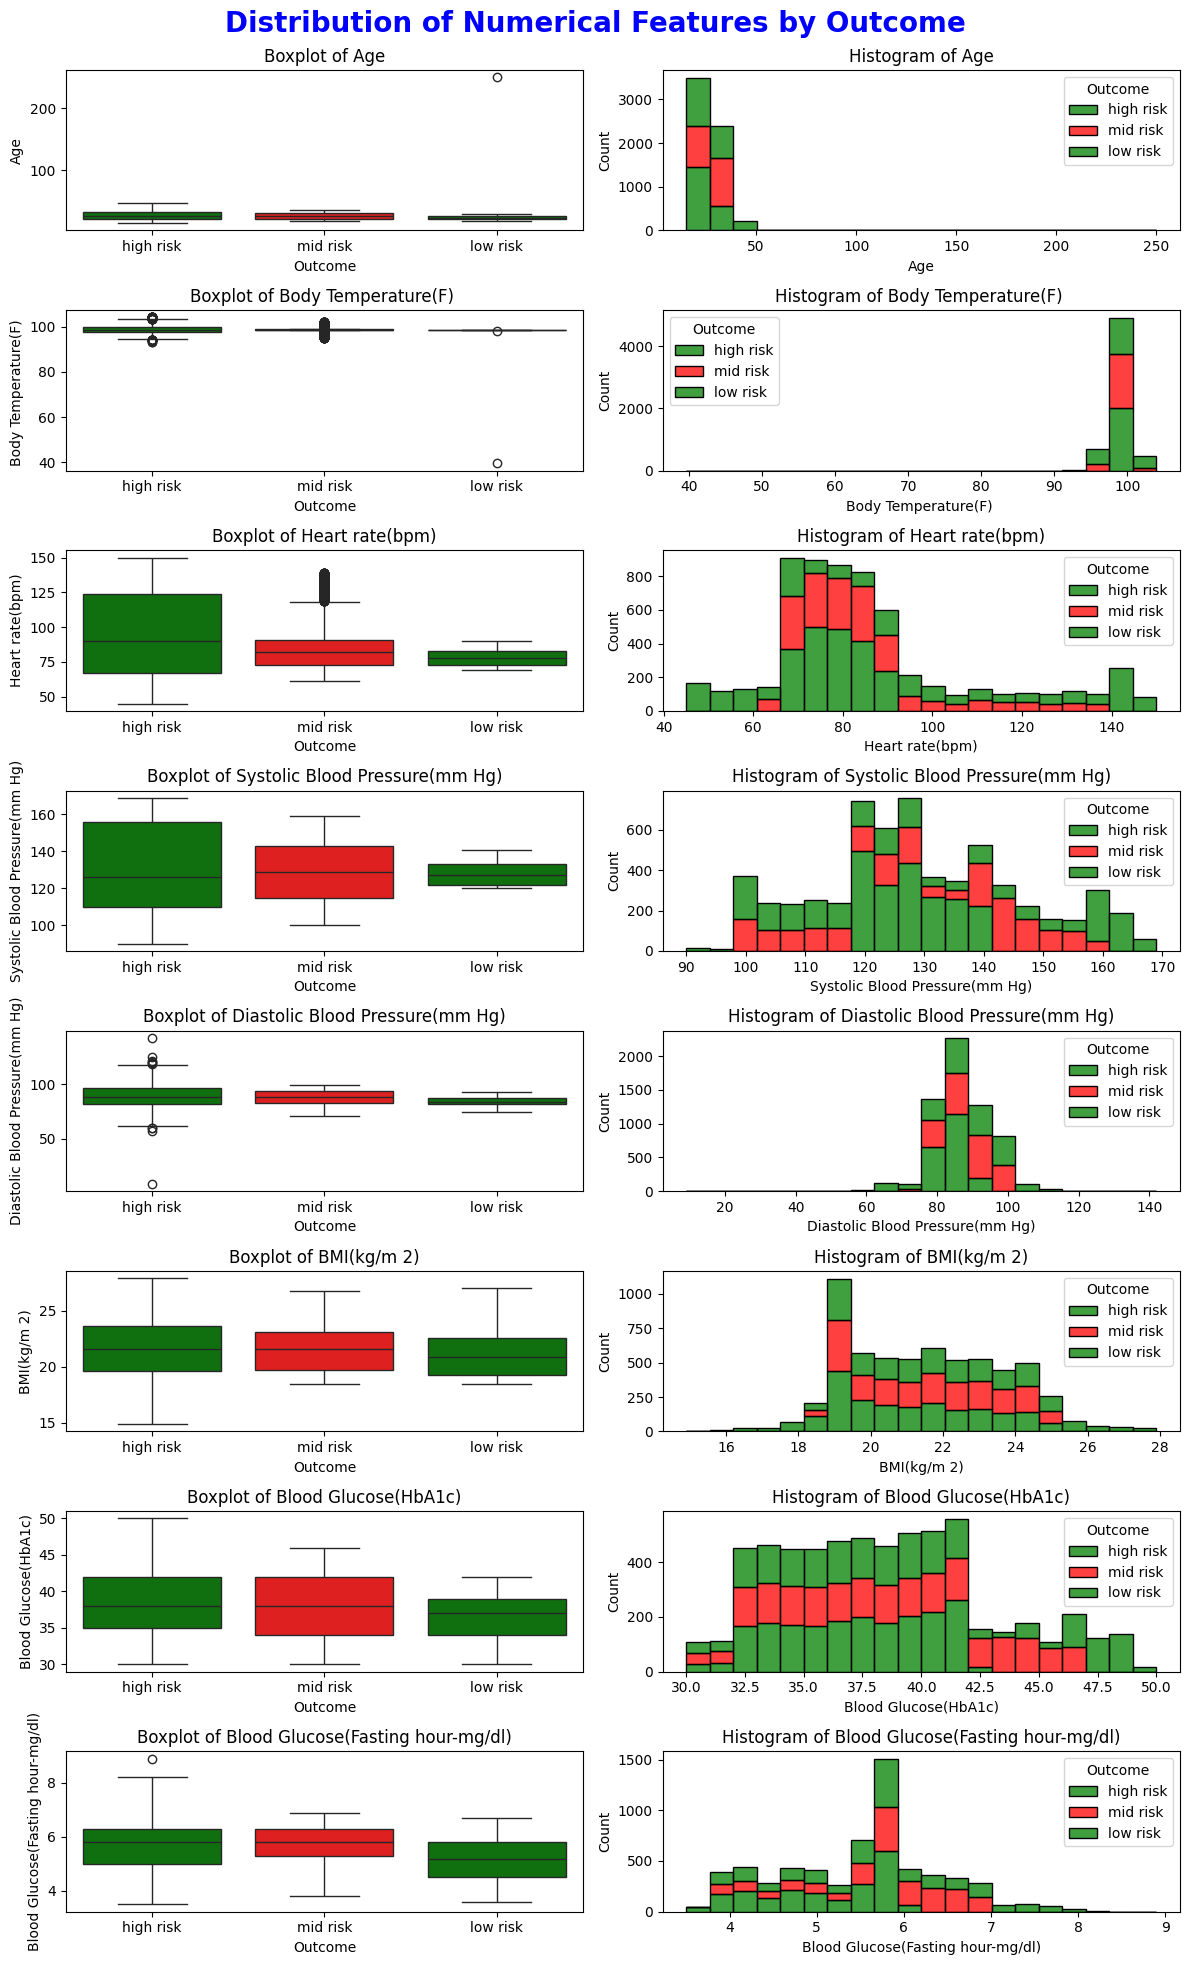

In [17]:
fig, ax = plt.subplots(8, 2, figsize=(12, 20))  # 8 rows for each feature, 2 columns (1 for boxplot, 1 for histogram)
fig.suptitle('Distribution of Numerical Features by Outcome', fontsize=20, fontweight='bold', color='blue', ha='center')

# Flatten the axes array for easy iteration
ax = ax.flatten()
clr1 = ['green','red']

# Loop through the continuous features
for i, col in enumerate(continuous_features):
    # Boxplot for each feature (on the left)
    sns.boxplot(data=df, x='Outcome', y=col, palette=clr1, ax=ax[2 * i])
    ax[2 * i].set_title(f'Boxplot of {col}', fontsize=12)
    
    # Histogram for each feature (on the right)
    sns.histplot(data=df, x=col, hue='Outcome', bins=20, multiple='stack', palette=clr1, ax=ax[2 * i + 1])
    ax[2 * i + 1].set_title(f'Histogram of {col}', fontsize=12)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.95)  # Adjust top spacing to fit the suptitle

#### Visualize the Target Feature

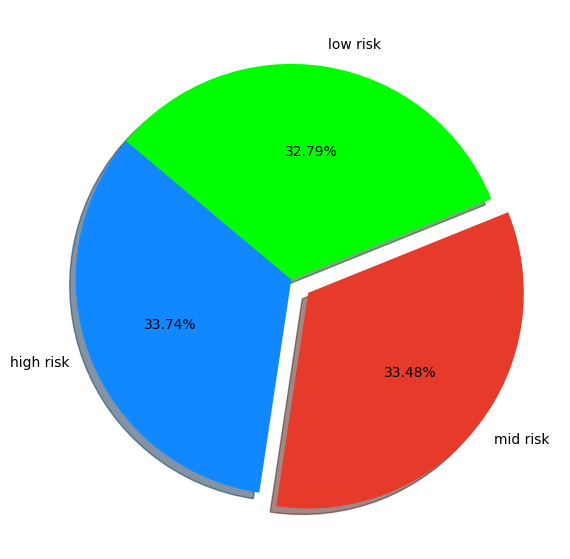

In [18]:
#piechart of target features
percentage = df['Outcome'].value_counts(normalize=True) * 100
labels = ['high risk', 'mid risk', 'low risk']
fig, ax = plt.subplots(figsize=(12,7))
explode = (0, 0.1,0)
colors = ['#1188ff','#e63a2a','#00FF00']
ax.pie(percentage, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.show()

In [34]:
#manula encoding
dicc = {'high risk':2, 'low risk':0, 'mid risk':1}
df['Outcome'] = df['Outcome'].map(dicc)

In [35]:

def remove_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to exclude outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from the 'age' column
new_df = remove_outliers_iqr(df, 'Age')

In [36]:
new_df.columns

Index(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')

In [18]:
### Check skekness
# Check Skewness
new_df[continuous_features].skew(axis=0, skipna=True)


Age                                  0.593922
Body Temperature(F)                 -8.666975
Heart rate(bpm)                      1.143694
Systolic Blood Pressure(mm Hg)       0.211560
Diastolic Blood Pressure(mm Hg)     -0.119357
BMI(kg/m 2)                          0.242586
Blood Glucose(HbA1c)                 0.415448
Blood Glucose(Fasting hour-mg/dl)   -0.033841
dtype: float64

- <span style="color: yellow;">**Positive skew**</span>: <span style="color: white;">Age, Heart rate (bpm), Systolic Blood Pressure (mm Hg), BMI (kg/m²), Blood Glucose (HbA1c)</span>
- <span style="color: red;">**Negative skew**</span>: <span style="color: white;">Body Temperature (F), Blood Glucose (Fasting hour - mg/dl)</span>
- <span style="color: orange;">**Approximately zero skew (near symmetry)**</span>: <span style="color: white;">Diastolic Blood Pressure (mm Hg)</span>

In [37]:

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['Age',
 'Body Temperature(F) ',
 'Heart rate(bpm)',
 'Systolic Blood Pressure(mm Hg)',
 'Diastolic Blood Pressure(mm Hg)',
 'BMI(kg/m 2)',
 'Blood Glucose(HbA1c)',
 'Blood Glucose(Fasting hour-mg/dl)']

new_df[transform_features] = pt.fit_transform(new_df[transform_features])

In [38]:
new_df.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,-1.274729,-0.826884,0.426720,1.739618,1.680024,1.528365,0.763460,0.325046,2
2,0.655266,-0.065691,0.098112,0.034463,-0.043776,-1.150028,0.959072,0.989355,1
3,0.123619,0.583093,1.847395,1.739618,1.815914,1.052536,1.666075,-1.107331,2
4,1.853886,2.923508,-2.314082,-1.404085,0.477969,-1.258483,0.122740,-1.326755,2
5,-1.001249,-0.065691,0.147625,0.762421,0.216109,0.324215,-2.121618,0.104036,1


In [39]:
new_df.skew(axis=0, skipna=True)

Age                                  0.022083
Body Temperature(F)                  0.474497
Heart rate(bpm)                     -0.022988
Systolic Blood Pressure(mm Hg)      -0.005735
Diastolic Blood Pressure(mm Hg)      0.106353
BMI(kg/m 2)                          0.007091
Blood Glucose(HbA1c)                 0.021781
Blood Glucose(Fasting hour-mg/dl)   -0.022709
Outcome                              0.007903
dtype: float64

In [40]:
new_df.shape

(6017, 9)

In [47]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [50]:
print(X.shape, y.shape)

(6017, 8) (6017,)


In [51]:
# separate dataset into train and test
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape
     

((4813, 8), (1204, 8))

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [56]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [57]:
grid_search.fit(X_train, y_train)
# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Score: 0.9808852706048967


In [59]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9775747508305648


In [61]:
y_train_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.992104716393102


In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting on test data
y_pred = best_model.predict(X_test)

# Printing classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       402
           1       0.97      0.97      0.97       411
           2       0.98      0.97      0.97       391

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204

Confusion Matrix:
[[399   3   0]
 [  4 399   8]
 [  2  10 379]]


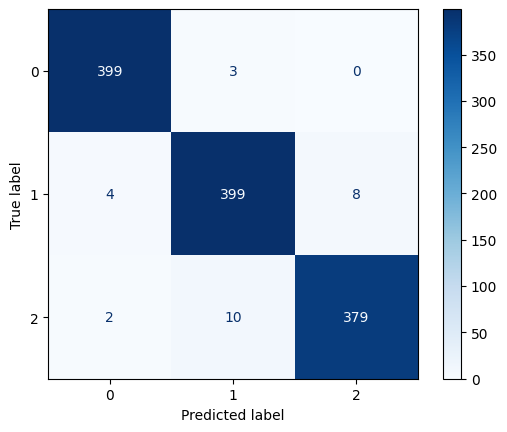

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues')  
plt.show()

In [73]:
import joblib
import pickle

In [74]:
# Save the trained model to a pickle file
with open("risk_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

In [75]:
def make_prediction(input_data):
    # Load the trained model from the pickle file
    with open("risk_model.pkl", "rb") as file:
        model = pickle.load(file)
    
    # Make predictions using the loaded model
    prediction = model.predict([input_data])  # input_data should be a list of feature values
    
    # Map prediction to 'Low risk', 'Mid risk', or 'High risk'
    if prediction == 0:
        risk_level = "Low risk"
    elif prediction == 1:
        risk_level = "Mid risk"
    else:
        risk_level = "High risk"
    
    return risk_level

In [76]:
# Age	Body Temperature(F)	Heart rate(bpm)	Systolic Blood Pressure(mm Hg)	Diastolic Blood Pressure(mm Hg)	BMI(kg/m 2)	Blood Glucose(HbA1c)	Blood Glucose(Fasting hour-mg/dl)	Outcome
# 0	1994601	Moulya	20	97.5	91	161	100	24.9	41	5.8	high risk

In [77]:
input_data = [20,97.5,91,161,100,24.9,41,5.8]
risk_prediction = make_prediction(input_data)
print(f"Prediction of patient: {risk_prediction}")

Prediction of patient: High risk
